<a href="https://colab.research.google.com/github/Tdavies92/AcademyPublic/blob/main/FPL%20(basic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd
import numpy as np

In [2]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
url_user = 'https://fantasy.premierleague.com/api/my-team/3994818/'

In [3]:
#use the requests package to make a GET request from the API endpoint:

r = requests.get(url)
r_user = requests.get(url_user)

In [4]:
#transform that request into a json object
json = r.json()
json_user = r_user.json()

In [5]:
#output the keys from the data set
json.keys()


dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [6]:
json_user.keys()

dict_keys(['detail'])

In [7]:
json_user.keys()

dict_keys(['detail'])

In [8]:
#build three sub-datasets from the main data set
elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])

In [9]:
elements_df.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,id,in_dreamteam,news,news_added,now_cost,photo,points_per_game,second_name,selected_by_percent,special,squad_number,status,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text
0,75.0,NaN,80201,0,0,-4,4,0,1,0.4,0.5,0,Bernd,0.0,1,False,Groin Injury - 75% chance of playing,2021-12-06T23:00:13.342729Z,46,80201.jpg,1.3,Leno,0.9,False,None,d,1,3,4,60444,254,176091,978,0.0,0.9,Leno,270,0,0,0,9,0,0,0,0,0,9,0,48,79.0,0.0,0.0,7.9,296,25,587,61,571,55,366,25,NaN,,NaN,,NaN,
1,0.0,0.0,115918,0,0,0,0,0,1,0.0,0.0,0,Rúnar Alex,0.0,2,False,Joined OH Leuven on a season-long loan - Expec...,2021-08-31T22:00:09.069158Z,40,115918.jpg,0.0,Rúnarsson,0.7,False,None,u,1,3,0,19017,0,66395,422,0.0,0.0,Rúnarsson,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,462,42,450,23,412,14,467,42,NaN,,NaN,,NaN,
2,0.0,0.0,47431,0,0,-2,2,0,3,0.0,0.0,0,Willian,0.0,3,False,Transferred to Corinthians,2021-08-20T09:30:14.065783Z,63,47431.jpg,0.0,Borges Da Silva,0.1,False,None,u,1,3,0,914,0,20255,14,0.0,0.0,Willian,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,635,260,634,260,634,260,635,260,NaN,,NaN,,NaN,
3,100.0,100.0,54694,0,0,-3,3,0,4,2.0,2.0,1,Pierre-Emerick,1.5,4,False,,2021-11-19T16:30:08.907928Z,97,54694.jpg,3.1,Aubameyang,2.8,False,None,a,1,3,44,715155,6180,733943,17508,0.2,4.5,Aubameyang,1036,4,1,6,16,0,0,2,3,0,0,7,131,217.6,132.4,582.0,92.9,115,14,128,21,6,3,27,10,NaN,,NaN,,1.0,
4,NaN,NaN,58822,0,0,-3,3,0,2,0.5,0.5,0,Cédric,0.0,5,False,,None,42,58822.jpg,0.3,Soares,0.2,False,None,a,1,3,1,11735,136,22924,176,0.0,0.2,Cédric,188,0,0,0,7,0,0,0,1,0,0,0,21,30.8,36.1,1.0,6.8,362,137,279,87,389,145,374,134,NaN,,NaN,,NaN,


In [10]:
#display all of the player features
elements_df.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank'

In [11]:
#keep only features required
slim_elements_df = elements_df[['second_name','team','element_type','selected_by_percent','now_cost','minutes','transfers_in','value_season','total_points', 'bonus']]
slim_elements_df.head()

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,bonus
0,Leno,1,1,0.9,46,270,60444,0.9,4,0
1,Rúnarsson,1,1,0.7,40,0,19017,0.0,0,0
2,Borges Da Silva,1,3,0.1,63,0,914,0.0,0,0
3,Aubameyang,1,4,2.8,97,1036,715155,4.5,44,7
4,Soares,1,2,0.2,42,188,11735,0.2,1,0


In [12]:
elements_types_df.head()

,id,plural_name,plural_name_short,singular_name,singular_name_short,squad_select,squad_min_play,squad_max_play,ui_shirt_specific,sub_positions_locked,element_count
0,1,Goalkeepers,GKP,Goalkeeper,GKP,2,1,1,True,[12],73
1,2,Defenders,DEF,Defender,DEF,5,3,5,False,[],217
2,3,Midfielders,MID,Midfielder,MID,5,2,5,False,[],263
3,4,Forwards,FWD,Forward,FWD,3,1,3,False,[],87


In [13]:
#bring in 'singular_name' from the elements_types table to the slim_elements_df table
slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
slim_elements_df.head()

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,bonus,position
0,Leno,1,1,0.9,46,270,60444,0.9,4,0,Goalkeeper
1,Rúnarsson,1,1,0.7,40,0,19017,0.0,0,0,Goalkeeper
2,Borges Da Silva,1,3,0.1,63,0,914,0.0,0,0,Midfielder
3,Aubameyang,1,4,2.8,97,1036,715155,4.5,44,7,Forward
4,Soares,1,2,0.2,42,188,11735,0.2,1,0,Defender


In [15]:
teams_df.head()

,code,draw,form,id,loss,name,played,points,position,short_name,strength,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,0,ARS,4,None,False,0,1190,1250,1110,1140,1110,1170,1
1,7,0,None,2,0,Aston Villa,0,0,0,AVL,3,None,False,0,1130,1160,1110,1120,1130,1160,2
2,94,0,None,3,0,Brentford,0,0,0,BRE,3,None,False,0,1070,1080,1130,1160,1100,1150,130
3,36,0,None,4,0,Brighton,0,0,0,BHA,3,None,False,0,1140,1140,1160,1190,1090,1130,131
4,90,0,None,5,0,Burnley,0,0,0,BUR,2,None,False,0,1040,1050,1040,1070,1060,1100,43


In [16]:
#bring in the team name
slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
slim_elements_df.head()

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,bonus,position
0,Leno,Arsenal,1,0.9,46,270,60444,0.9,4,0,Goalkeeper
1,Rúnarsson,Arsenal,1,0.7,40,0,19017,0.0,0,0,Goalkeeper
2,Borges Da Silva,Arsenal,3,0.1,63,0,914,0.0,0,0,Midfielder
3,Aubameyang,Arsenal,4,2.8,97,1036,715155,4.5,44,7,Forward
4,Soares,Arsenal,2,0.2,42,188,11735,0.2,1,0,Defender


In [18]:
#convert all value_season entries to float
slim_elements_df['value'] = slim_elements_df.value_season.astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
#sort the dataframe by decending value
slim_elements_df.sort_values('value',ascending=False).head(20)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,bonus,position,value
567,Dennis,Watford,4,23.9,56,1078,3042174,13.4,75,12,Forward,13.4
631,Malheiro de Sá,Wolves,1,3.2,50,1350,462662,13.4,67,7,Goalkeeper,13.4
370,Cancelo,Man City,2,39.0,68,1337,3188353,12.4,84,12,Defender,12.4
189,James,Chelsea,2,34.9,62,729,3500548,12.3,76,13,Defender,12.3
344,Alexander-Arnold,Liverpool,2,40.1,81,1143,2702934,12.2,99,18,Defender,12.2
610,Coady,Wolves,2,6.1,45,1346,475860,12.0,54,2,Defender,12.0
515,Dier,Spurs,2,6.4,45,1181,937760,12.0,54,6,Defender,12.0
33,Ramsdale,Arsenal,1,14.5,50,1080,1350541,11.8,59,5,Goalkeeper,11.8
175,Rüdiger,Chelsea,2,22.0,61,1260,2459584,11.8,72,4,Defender,11.8
197,Gallagher,Crystal Palace,3,24.9,61,1225,3035287,11.8,72,9,Midfielder,11.8


In [20]:
#remove all values where there was no score
slim_elements_df = slim_elements_df.loc[slim_elements_df.value > 0]

In [21]:
#position analysis
pivot = slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()
pivot.sort_values('value',ascending=False)

,position,value
2,Goalkeeper,6.816129
0,Defender,5.494872
3,Midfielder,4.453731
1,Forward,3.909231


In [22]:
#team value analysis
team_pivot = slim_elements_df.pivot_table(index='team',values='value',aggfunc=np.mean).reset_index()
team_pivot.sort_values('value',ascending=False)

,team,value
19,Wolves,6.688889
18,West Ham,6.242105
5,Chelsea,6.096000
10,Liverpool,5.728000
2,Brentford,5.400000
11,Man City,5.365217
6,Crystal Palace,5.281818
15,Southampton,5.185714
16,Spurs,5.040909
3,Brighton,4.979167


In [32]:
slim_elements_df.sort_values('total_points',ascending=False).head(20)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,bonus,position,value
340,Salah,Liverpool,3,73.1,131,1350,2641052,11.6,152,19,Midfielder,11.6
344,Alexander-Arnold,Liverpool,2,40.1,81,1143,2702934,12.2,99,18,Defender,12.2
370,Cancelo,Man City,2,39.0,68,1337,3188353,12.4,84,12,Defender,12.4
375,Veiga de Carvalho e Silva,Man City,3,22.3,75,1208,2067621,11.2,84,12,Midfielder,11.2
513,Son,Spurs,3,20.9,104,1138,2355757,7.8,81,10,Midfielder,7.8
347,Jota,Liverpool,3,29.6,80,1000,3533681,9.9,79,2,Midfielder,9.9
337,Mané,Liverpool,3,4.1,119,1273,503066,6.6,79,2,Midfielder,6.6
336,van Dijk,Liverpool,2,17.9,66,1350,1013233,11.8,78,8,Defender,11.8
270,Vardy,Leicester,4,26.3,107,1230,3200543,7.2,77,14,Forward,7.2
189,James,Chelsea,2,34.9,62,729,3500548,12.3,76,13,Defender,12.3


In [23]:
fwd_df = slim_elements_df.loc[slim_elements_df.position == 'Forward']
mid_df = slim_elements_df.loc[slim_elements_df.position == 'Midfielder']
def_df = slim_elements_df.loc[slim_elements_df.position == 'Defender']
goal_df = slim_elements_df.loc[slim_elements_df.position == 'Goalkeeper']

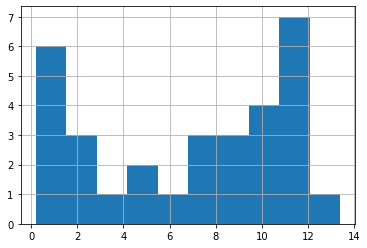

In [24]:
goal_df.value.hist()

In [25]:
#Top GK's
goal_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,bonus,position,value
631,Malheiro de Sá,Wolves,1,3.2,50,1350,462662,13.4,67,7,Goalkeeper,13.4
33,Ramsdale,Arsenal,1,14.5,50,1080,1350541,11.8,59,5,Goalkeeper,11.8
508,Lloris,Spurs,1,8.8,54,1260,876995,11.7,63,7,Goalkeeper,11.7
482,McCarthy,Southampton,1,4.6,46,1350,464853,11.5,53,3,Goalkeeper,11.5
393,de Gea,Man Utd,1,6.5,50,1350,647091,11.2,56,2,Goalkeeper,11.2
198,Guaita,Crystal Palace,1,8.0,46,1350,583319,11.1,51,3,Goalkeeper,11.1
338,Ramses Becker,Liverpool,1,7.7,60,1260,516069,11.0,66,5,Goalkeeper,11.0
119,Sánchez,Brighton,1,19.2,46,1260,993508,10.9,50,5,Goalkeeper,10.9
190,Mendy,Chelsea,1,19.9,63,1260,1276154,10.5,66,3,Goalkeeper,10.5
38,Martínez,Aston Villa,1,13.5,55,1260,364239,10.4,57,7,Goalkeeper,10.4


,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,bonus,position,value
370,Cancelo,Man City,2,39.0,68,1337,3188353,12.4,84,12,Defender,12.4
189,James,Chelsea,2,34.9,62,729,3500548,12.3,76,13,Defender,12.3
344,Alexander-Arnold,Liverpool,2,40.1,81,1143,2702934,12.2,99,18,Defender,12.2
610,Coady,Wolves,2,6.1,45,1346,475860,12.0,54,2,Defender,12.0
515,Dier,Spurs,2,6.4,45,1181,937760,12.0,54,6,Defender,12.0
336,van Dijk,Liverpool,2,17.9,66,1350,1013233,11.8,78,8,Defender,11.8
175,Rüdiger,Chelsea,2,22.0,61,1260,2459584,11.8,72,4,Defender,11.8
524,Reguilón,Spurs,2,17.8,53,1062,2087239,11.7,62,8,Defender,11.7
77,Henry,Brentford,2,1.9,45,1298,215227,11.6,52,3,Defender,11.6
499,Livramento,Southampton,2,21.6,45,1345,2265613,11.6,52,2,Defender,11.6


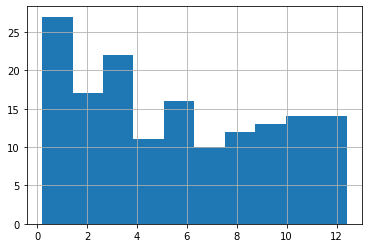

In [26]:
#Defender Analysis
def_df.value.hist()
def_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,bonus,position,value
567,Dennis,Watford,4,23.9,56,1078,3042174,13.4,75,12,Forward,13.4
570,King,Watford,4,6.0,57,996,729445,9.5,54,5,Forward,9.5
453,Pukki,Norwich,4,5.9,59,1279,690720,9.5,56,8,Forward,9.5
586,Antonio,West Ham,4,39.0,79,1258,5082626,9.0,71,12,Forward,9.0
438,Saint-Maximin,Newcastle,4,16.8,69,1326,2300483,8.8,61,9,Forward,8.8
114,Maupay,Brighton,4,3.3,63,1014,619510,8.7,55,11,Forward,8.7
72,Toney,Brentford,4,20.4,67,1260,1986285,8.2,55,7,Forward,8.2
636,Hwang,Wolves,4,8.7,56,943,1529935,8.0,45,8,Forward,8.0
503,Armstrong,Southampton,4,3.8,60,1046,777585,7.7,46,3,Forward,7.7
611,Jiménez,Wolves,4,9.4,77,1261,1659614,7.3,56,9,Forward,7.3


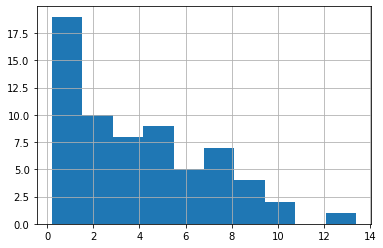

In [27]:
#Defender Analysis
fwd_df.value.hist()
fwd_df.sort_values('value',ascending=False).head(10)